# Ventura Basin Sediment Mixing (Gilbert et al., 2021)

#-*- coding: utf-8 -*-
"""
Created on Feb 1, 2021

@author: clarkgilbert

This code was heavily modified by clarkgilbert from the CentralCA_ForwardMixing.py file within the 'sediment_unmixing' python package (https://github.com/grsharman/sediment_unmixing);(doi:10.1016/j.epsl.2017.07.044.).

This code was written to create the kernel density estimates in Figure 2 and the best fit mixture models in Figure 3 in the 
manuscript Gilbert et al. (2021) which was submitted to Geology for review. The sediment_unmixing package must be downloaded in order to use this script. The zircon geochronology data used in the manuscript can be found in the file named 'Table_A2_ZirconGeochronologyData.xlsx' within the data supplement of this manuscript. The 'VenturaBasinMixing.ipynb'
must be moved into the 'sediment_unmixing-master' folder and the 'Table_A2_ZirconGeochronologyData.xlsx' file must be moved 
into the folder named 'Test Data' in order to work properly. Any questions can be directed to the corresponding author at clarkgilbert@mines.edu. 


Dependencies

numpy
matplotlib
os

MixtureModel
populationMetrics
detritalPopulation

In [90]:
import MixtureModel as mm #the class that performs mixture modelling
import populationMetrics as popMetrics #Functions for evaluating mixtures
import detritalPopulation as dp #contains 'population' the class describing detrital populations
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import os

# Define the path to the data and the parameters for the mixture modeling

In [91]:
#Define the path to the data
filePath = os.path.join('TestData','Table_A2_ZirconGeochronologyData.xlsx')

#Define the path to output the summary data
outfile = os.path.join('TestData','VB_mixingResults.txt')

#Name of the sheet that contains the data
excelSheet = 'U_Pb_Data'

#Name of the rows in the exceel sheet that contain information
ageHeader = 'BestAge' #For ages
errorHeader = 'BestAge_err_1s_Ma' #For 1-sigma errors
sampleID = 'Sample_ID' #For sample names

# Define parameters for the axis of CDFs and PDFs - NOTE THAT RESULTS ARE NOT INDEPENDENT OF THIS
minAge = 0.0
maxAge = 2000.0
tSpacing = 1.0

#Names of parents and daughters
ParentList =['Parent_CJ','Parent_LG','Parent_SGA','Parent_MG']
ParentNames = ['CJ','LG','SGA','MG']
DaughterList =['t7','t6','t5','t4','t3','t2','t1','t0'] 

#What function should be used to compare the data?
#objFunc = popMetrics.mixture_Likeness
#objFunc = popMetrics.mixture_Similarity
#objFunc = popMetrics.mixture_correlationCoeff #For the cross correlation of PDFs (e.g. Saylor and Sundell,2016)
#objFunc = popMetrics.mixture_Dmax #For Dmax
objFunc = popMetrics.mixture_Vmax #For Vmax

#Do 'good' mixtures get high values or low values with this objective function
mixOrder = 'normal' #Low values correspond to good mixtures (e.g. Dmax)
#mixOrder = 'reverse' #high values correspond to good mixtures (e.g. cross correlation)

#At what resolution to we want to create mixtures
mixSpacing = 0.01 #Keep coarse for testing (e.g. 0.1 (10%) ) to improve efficiency

# Load in the parents and daughters

In [92]:
parentSet = []
for parent in ParentList:
    parentSet.append(dp.population(excelFileName = filePath,excelSheetName = excelSheet,ageHeader = ageHeader,errorHeader = errorHeader,sampleIDfield=sampleID,sampleID = parent))
    
daughterSet = []
for daughter in DaughterList:
    daughterSet.append(dp.population(excelFileName = filePath,excelSheetName = excelSheet,ageHeader = ageHeader,errorHeader = errorHeader,sampleIDfield=sampleID,sampleID = daughter))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


# Calculate the CDFs and PDFs for the parents and daughters

'''NOTE! when a population instance is created, the PDFs and CDFs are created by default
to highlight the data present in that population. This means that different populations
may have distributions calculated on different axes. Most comparisons of distributions
require the distributions to be calculated on matching axis - so we need to re-calculate distributions.

It is also important to recognize that the values of many comparison functions are sensitive to the axis they are calculated on.
That is, the same two sets of ages and errors could generate different values of a comparison/ objective function when calculated
on different time axes (e.g. differences in spacing or extent)'''

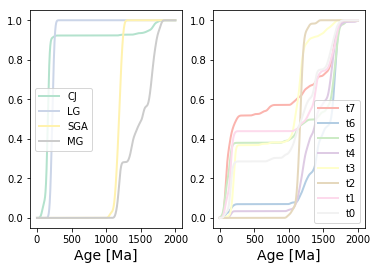

In [93]:
#Plot the data
plt.figure()
plt.subplot(1,2,2)

#For different colormap options see the matplotlib colormap reference:
#https://matplotlib.org/examples/color/colormaps_reference.html
daughterCmap = 'Pastel1'
parentCmap = 'Pastel2'

cfun = cm.get_cmap(daughterCmap)
daughterColors = [cfun(i) for i in np.linspace(0,1,len(daughterSet))]

cfun = cm.get_cmap(parentCmap)
parentColors = [cfun(i) for i in np.linspace(0,1,len(parentSet))]


for i,daughter in enumerate(daughterSet):
    daughter.calcDF(forceCalc = True, method = 'kde', bandwidth = 20, tmin = minAge, tmax = maxAge, delt = tSpacing)
    
    #The CDF also needs a method to know how to calculate that, either 'discrete' or 'integrated pdf'
    daughter.calcCDF(forceCalc = True, method = 'integrated pdf', bandwidth = 20, tmin = minAge, tmax = maxAge, delt = tSpacing)
    
    #plot this
    daughter.plotCDF(color = daughterColors[i],linewidth = 2, label = DaughterList[i])
    
plt.legend(loc = 'best')

plt.subplot(1,2,1)
for i,parent in enumerate(parentSet):
    parent.calcDF(forceCalc = True, method = 'kde', bandwidth = 20, tmin = minAge, tmax = maxAge, delt = tSpacing)
    
    #The CDF also needs a method to know how to calculate that, either 'discrete' or 'integrated pdf'
    parent.calcCDF(forceCalc = True, method = 'integrated pdf', bandwidth = 20, tmin = minAge, tmax = maxAge, delt = tSpacing)
    
    #plot this
    parent.plotCDF(color = parentColors[i],linewidth = 2, label = ParentNames[i])
    
plt.legend(loc = 'best')

# Plot kernel kensity estimates for each child (Figure 2B in Gilbert et al., 2021)

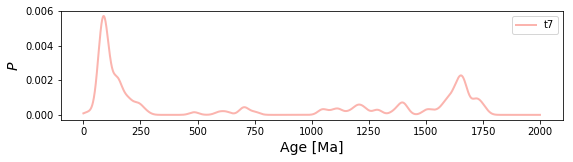

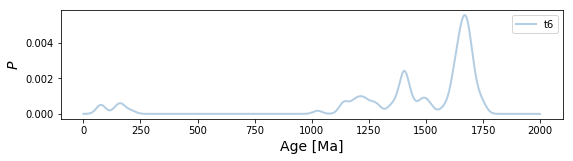

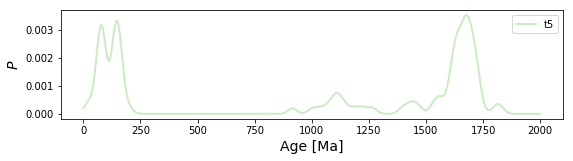

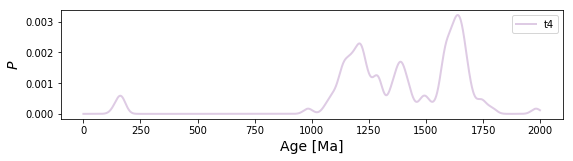

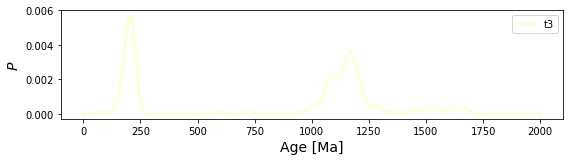

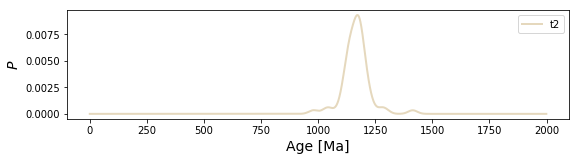

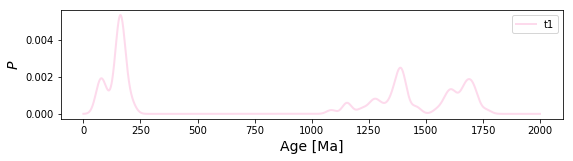

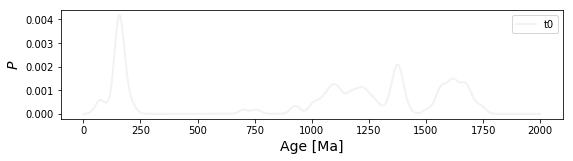

In [95]:
for i,daughter in enumerate(daughterSet):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,2), sharex=True, sharey=True)
    daughter.plotDF(color = daughterColors[i],linewidth = 2, label = DaughterList[i])
    plt.legend(loc = 'best')
    
plt.show()
    

# Plot kernel density estimates for each parent (Figure 2A in Gilbert et al., 2021)

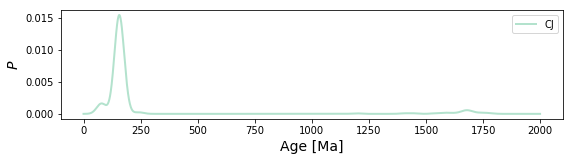

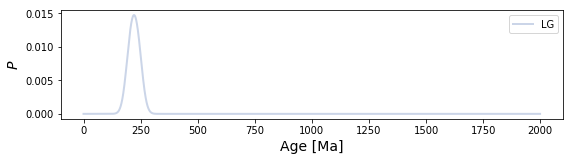

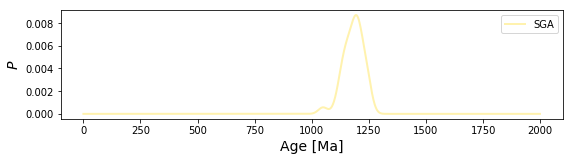

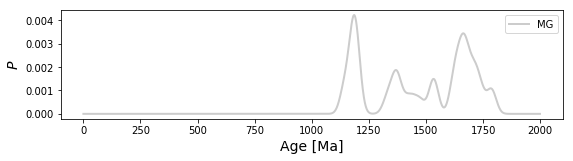

In [96]:
for i,parent in enumerate(parentSet):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(9,2), sharex=True, sharey=True)
    parent.plotDF(color = parentColors[i],linewidth = 2, label = ParentNames[i])
    plt.legend(loc = 'best')

plt.show()

# Recalculate kernel density estimates at finer bandwidth (1.5 Ma) for mixture models

In [97]:
for i,daughter in enumerate(daughterSet):
    daughter.calcDF(forceCalc = True, method = 'kde', bandwidth = 100, tmin = minAge, tmax = maxAge, delt = tSpacing)
    
for i,parent in enumerate(parentSet):
    parent.calcDF(forceCalc = True, method = 'kde', bandwidth = 100, tmin = minAge, tmax = maxAge, delt = tSpacing)

# Create mixture models for all the daughters

In [98]:
mixSet = mm.mixtureModelSet(daughterSet,parentSet,objFunc,dFrac = mixSpacing,parentNames = ParentNames,daughterNames = DaughterList)
mixSet.sortMixtures(mixtureOrder = mixOrder)

#Write the results to a text files (will not overwrite existing files)
mixSet.outputResultsSummary(outfile)

# Plot the CDFs of the best mixtures

This function outputs the CDFs of the best fit mixture models that were used in Figure 3 in Gilbert et al. (2021). However, bootstrapping method similar to Malkowski et al. (2019) was implemented in order to estimate uncertainty in the models which is not included in this code. See Appendix_DR1.doc in the data supplement for details on the methods.

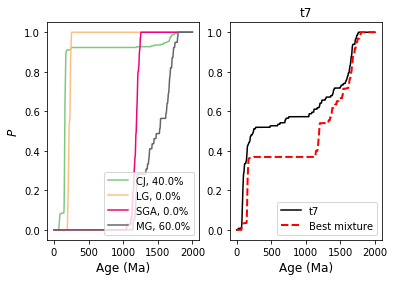

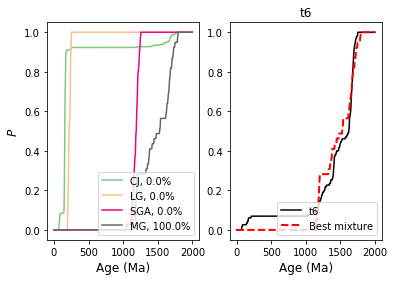

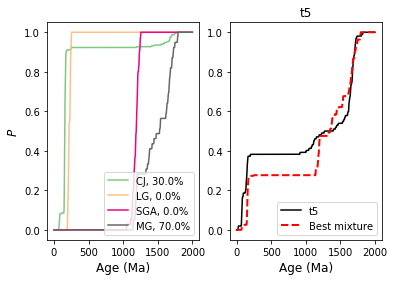

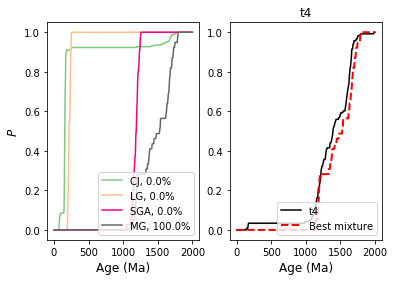

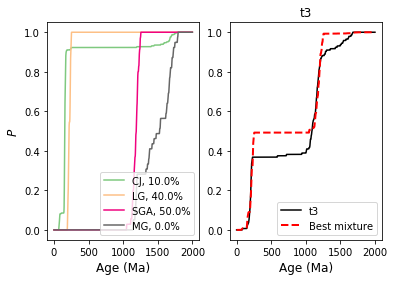

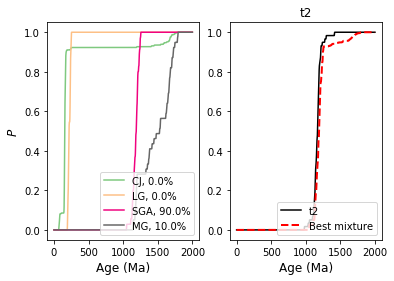

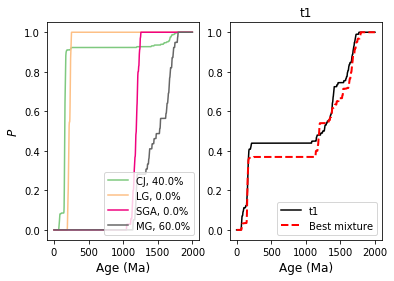

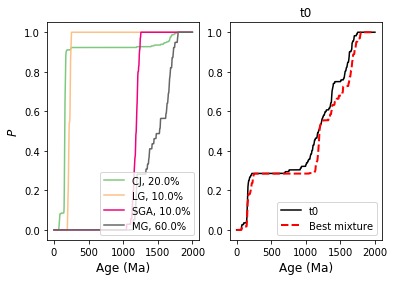

In [89]:
mixSet.plotMixtureResults(plottingStyle='best mixture')